# 🎓 Academic Risk & Retention Analysis (Synthetic Data)
This notebook replicates a real-world academic analysis on student retention and academic warnings using mock data. All data is fictional and used strictly for demonstration purposes.

In [1]:
# 📥 Load Libraries and Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load synthetic data
df = pd.read_csv('mock_academic_warning_data.csv')
df.head()

,StudentID,TermNumber,TermGPA,CumulativeGPA,AcademicWarnings,Graduated
0,1000,7,0.77,0.79,2,0
1,1001,4,1.49,1.64,0,0
2,1002,11,0.89,0.42,0,0
3,1003,8,1.95,1.79,3,0
4,1004,5,2.21,2.45,0,1


In [2]:
# 📊 Summary Statistics & Structure
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   StudentID         1000 non-null   int64  
 1   TermNumber        1000 non-null   int64  
 2   TermGPA           1000 non-null   float64
 3   CumulativeGPA     1000 non-null   float64
 4   AcademicWarnings  1000 non-null   int64  
 5   Graduated         1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB
None


,StudentID,TermNumber,TermGPA,CumulativeGPA,AcademicWarnings,Graduated
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1499.500000,5.84000,2.253970,2.256410,1.249000,0.582000
std,288.819436,3.15854,0.701447,0.750896,1.385973,0.493477
min,1000.000000,1.00000,0.170000,0.000000,0.000000,0.000000
25%,1249.750000,3.00000,1.790000,1.760000,0.000000,0.000000
50%,1499.500000,6.00000,2.245000,2.250000,1.000000,1.000000
75%,1749.250000,9.00000,2.702500,2.732500,2.000000,1.000000
max,1999.000000,11.00000,4.000000,4.000000,5.000000,1.000000


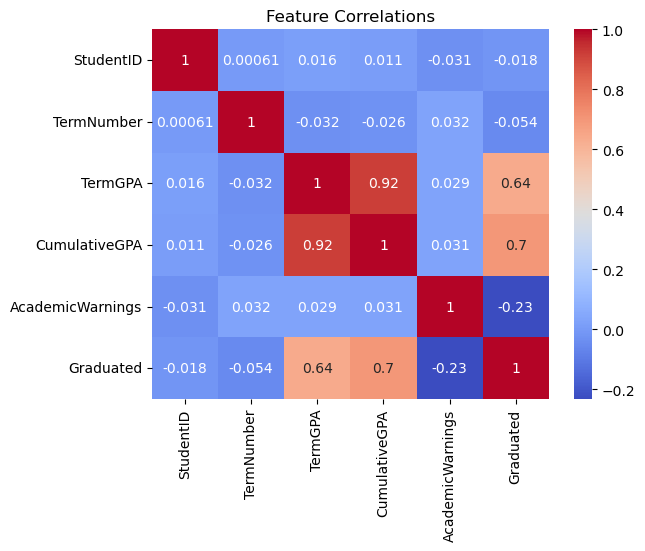

In [3]:
# 🎯 Correlation Analysis
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

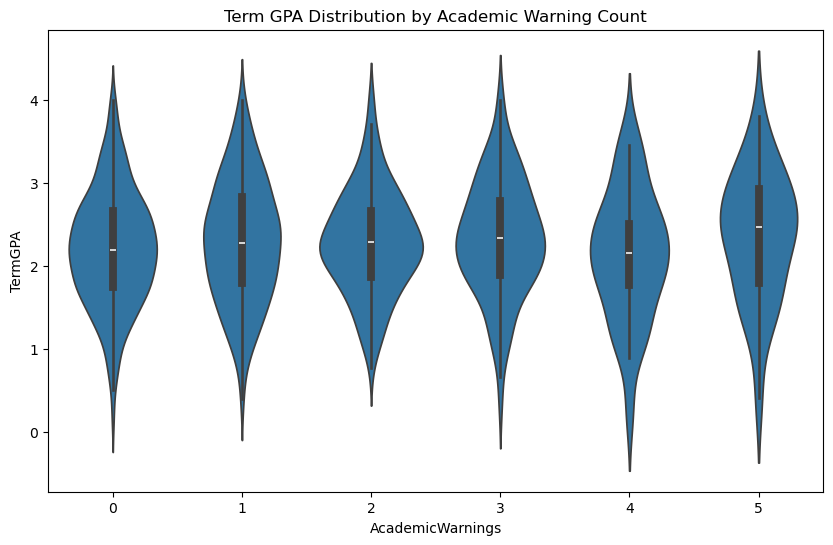

In [4]:
# 📉 GPA Distribution by Academic Warnings
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='AcademicWarnings', y='TermGPA')
plt.title('Term GPA Distribution by Academic Warning Count')
plt.show()

In [5]:
# 📈 Term GPA vs. Academic Warnings (Regression)
import statsmodels.api as sm
X = df[['AcademicWarnings']]
X = sm.add_constant(X)
y = df['TermGPA']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                TermGPA   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8584
Date:                Thu, 24 Jul 2025   Prob (F-statistic):              0.354
Time:                        08:32:46   Log-Likelihood:                -1063.4
No. Observations:                1000   AIC:                             2131.
Df Residuals:                     998   BIC:                             2141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.2354      0.030  

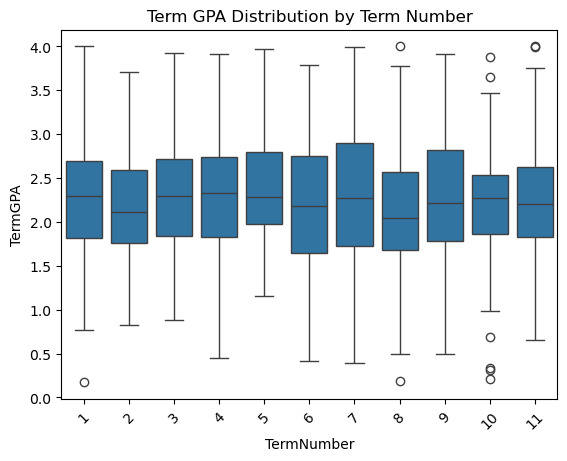

In [6]:
# ⏱️ Recovery Time Insight (GPA by Term)
sns.boxplot(data=df, x='TermNumber', y='TermGPA')
plt.title('Term GPA Distribution by Term Number')
plt.xticks(rotation=45)
plt.show()

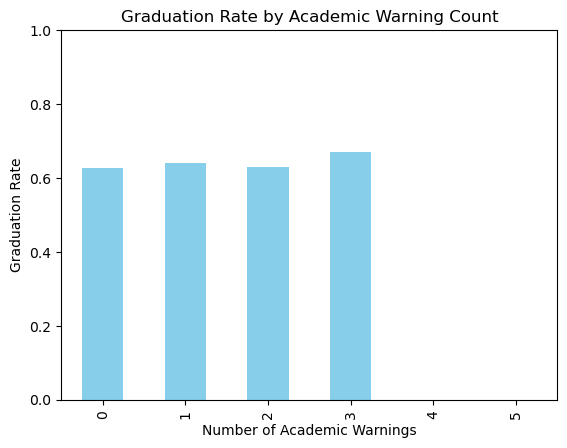

In [7]:
# 🎓 Graduation Rate by Warning Level
grad_rates = df.groupby('AcademicWarnings')['Graduated'].mean()
grad_rates.plot(kind='bar', color='skyblue')
plt.title('Graduation Rate by Academic Warning Count')
plt.ylabel('Graduation Rate')
plt.xlabel('Number of Academic Warnings')
plt.ylim(0, 1)
plt.show()

## ✅ Key Findings
- Students with fewer warnings generally maintain higher GPAs.
- A single warning correlates with a minor GPA drop; 3+ warnings show significant decline.
- Graduation likelihood declines as warning count increases.
- Most academic recoveries occur by Term 2–3, suggesting early intervention is critical.